### Course: Neural Networks (EECE 8740)
### Name: Felix Havugimana
### ID: U00743094
### Assignment 1: Question2





### Introduction
This notebook contains the implementation of deep neural Network (DNN) using Keras on MNIST dataset. 

Here is the problem desciption:
#### Problem statement :    
Design and evaluate Deep Neural Network (DNN) models considering the following criteria:

I. 784 →150 →120 →10

II. 784 →500 →250 → 100 →10
 Activation functions: sigmoid
Use a SoftMax activation function for classification

Categorical Cross-Entropy loss

Number of epochs: 50 and
    
Number of epochs: 50 and
    


## Methodology

### Step 1: Dataset loading and Preprocessing
We can load MNIST using keras function mnist.load_data() which splits the data into train and test sets
Training and testing datasets have 60000 and 10000 28x28 gray scale images respectively.

In [102]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.multiclass import unique_labels

(x_train, y_train), (x_test, y_test)  = mnist.load_data()
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

print ("Training Data shape: ",x_train.shape)
print ("Testing Data shape: ",x_test.shape)
print ("Training labels shape: ",y_train.shape)
print ("Testing Data shape: ",y_test.shape)

Training Data shape:  (60000, 28, 28)
Testing Data shape:  (10000, 28, 28)
Training labels shape:  (60000,)
Testing Data shape:  (10000,)


### Step1-2: Image scaling and reshaping
Here we will first scale down the image from 0-255 to 0-1. Next we will flatten images into one dimension to be compatible with DNN(We don't need this for DCNN)

In [103]:
import numpy as np



image_size = x_train.shape[1]*x_train.shape[1]
input_shape =x_train.shape[1]

x_train = np.reshape(x_train, [-1, image_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, image_size])
x_test = x_test.astype('float32') / 255




# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


Number of Classes: 10
x_train shape: (60000, 784)
60000 train samples
10000 test samples


### Step2 Part 1: Now let's design Deep Neural Network (DNN) model for the first configuration

#### a) Design our  DNN models with following configuration:
Configuration: I. 784 →150 →120 →10

The model has 4 dense layers with above number of hidden units in each layer. I added dropout layer with dropout rate of 30% after the first layer and third layer to avoid overfitting. I used sigmoid function as an activation function and softmax for classification. Further, I used categorical crossentropy loss and Adam optimizer

In [104]:

batch_size = 64
hidden_units = [784,250,120,10]

# create model

model = Sequential()
model.add(Dense(hidden_units[0],input_dim=image_size, activation='sigmoid'))
model.add(Dropout(0.30))

model.add(Dense(hidden_units[1], activation="sigmoid"))

model.add(Dense(hidden_units[2], activation='sigmoid'))
model.add(Dropout(0.30))

model.add(Dense(hidden_units[3], activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_10 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_46 (Dense)             (None, 120)               30120     
_________________________________________________________________
dropout_11 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1210      
Total params: 843,020
Trainable params: 843,020
Non-trainable params: 0
_______________________________________________

### Step 3 model training
The models from both configurations will be trained over 50 epochs with batch size of 64 samples. Also I used keras call backs to track the training perfomance and use adaptive learning rate. The model will reduce learning with a factor of 0.2 if validation loss doesn't reduce for 3 epochs. This will help improve model performance.

In [105]:
checkpoint = ModelCheckpoint("DNN2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)



reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.000001)

# we put our call backs into a callback list
callbacks = [ checkpoint,reduce_lr]



In [106]:
batch_size = 64
epochs = 50
time_start=time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    callbacks=callbacks,
                    validation_data = (x_test, y_test))
time_elapsed = (time.perf_counter() - time_start)




Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5290 - accuracy: 0.8401 - val_loss: 0.2032 - val_accuracy: 0.9363

Epoch 00001: val_loss improved from inf to 0.20320, saving model to DNN2.h5
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2039 - accuracy: 0.9407 - val_loss: 0.1462 - val_accuracy: 0.9561

Epoch 00002: val_loss improved from 0.20320 to 0.14623, saving model to DNN2.h5
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1444 - accuracy: 0.9573 - val_loss: 0.1068 - val_accuracy: 0.9687

Epoch 00003: val_loss improved from 0.14623 to 0.10681, saving model to DNN2.h5
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1100 - accuracy: 0.9668 - val_loss: 0.0926 - val_accuracy: 0.9721

Epoch 00004: val_loss improved from 0.10681 to 0.09257, saving model to DNN2.h5
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0905 - accuracy: 0.9726 - val_loss: 

938/938 [==============================] - 3s 3ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0596 - val_accuracy: 0.9867

Epoch 00038: val_loss did not improve from 0.05681
Epoch 39/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0596 - val_accuracy: 0.9867

Epoch 00039: val_loss did not improve from 0.05681
Epoch 40/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0596 - val_accuracy: 0.9867

Epoch 00040: val_loss did not improve from 0.05681

Epoch 00040: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Epoch 41/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0596 - val_accuracy: 0.9867

Epoch 00041: val_loss did not improve from 0.05681
Epoch 42/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0596 - val_accuracy: 0.9867

Epoch 000

In [107]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time is {} seconds:".format(time_elapsed))

Test loss: 0.059612810611724854
Test accuracy: 0.9866999983787537
Computation time is 135.155648319982 seconds:


### Step 3: Model evaluation
Here I will show both validation loss and accuracy as well as loss and accuracy curves.

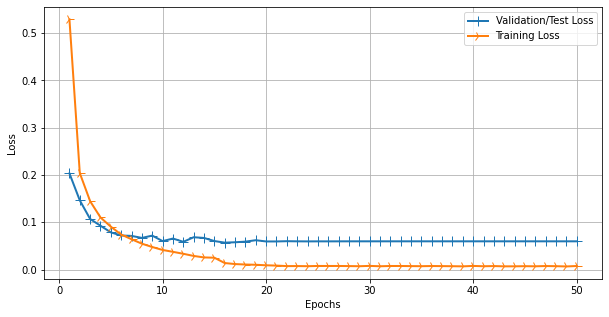

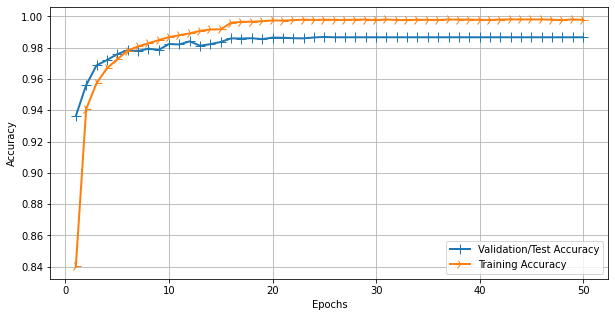

In [108]:
import time

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,5))

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()


## Design DNN for the Second Configuration
II. 784 →500 →250 → 100 →10

The model has 5 dense layers with above number of hidden units in each layer. I added dropout layer with dropout rate of 30% after the first layer and third layer to avoid overfitting. I used sigmoid function as an activation function and softmax for classification. Further, I used categorical crossentropy loss and Adam optimizer.

In [109]:
hidden_units=[784,500,250,100,10]

model2 = Sequential()
model2.add(Dense(hidden_units[0],input_dim=image_size, activation='sigmoid'))
model2.add(Dropout(0.30))

model2.add(Dense(hidden_units[1], activation="sigmoid"))
# model2.add(Dropout(0.30))

model2.add(Dense(hidden_units[2], activation='sigmoid'))
model2.add(Dropout(0.30))
model2.add(Dense(hidden_units[3], activation='sigmoid'))
# model2.add(Dropout(0.30))

model2.add(Dense(hidden_units[4], activation='softmax'))

model2.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics = ['accuracy'])

print(model2.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_12 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_50 (Dense)             (None, 250)               125250    
_________________________________________________________________
dropout_13 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_52 (Dense)             (None, 10)              

/home/kashraf/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [110]:
checkpoint = ModelCheckpoint("DNN1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)



reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.000001)

# we put our call backs into a callback list
callbacks = [ checkpoint,reduce_lr]




In [111]:
batch_size = 64
epochs = 50
time_start=time.perf_counter()

history2 = model2.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    callbacks=callbacks,
                    validation_data = (x_test, y_test))
time_elapsed = (time.perf_counter() - time_start)

score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 1.6371 - accuracy: 0.4715 - val_loss: 0.8812 - val_accuracy: 0.7642

Epoch 00001: val_loss improved from inf to 0.88123, saving model to DNN1.h5
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.6829 - accuracy: 0.8198 - val_loss: 0.4770 - val_accuracy: 0.8776

Epoch 00002: val_loss improved from 0.88123 to 0.47701, saving model to DNN1.h5
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.4558 - accuracy: 0.8763 - val_loss: 0.3649 - val_accuracy: 0.9000

Epoch 00003: val_loss improved from 0.47701 to 0.36491, saving model to DNN1.h5
Epoch 4/50
938/938 [==============================] - 3s 4ms/step - loss: 0.3736 - accuracy: 0.8959 - val_loss: 0.3162 - val_accuracy: 0.9084

Epoch 00004: val_loss improved from 0.36491 to 0.31625, saving model to DNN1.h5
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3297 - accuracy: 0.9056 - val_loss: 

938/938 [==============================] - 3s 4ms/step - loss: 0.0711 - accuracy: 0.9783 - val_loss: 0.0811 - val_accuracy: 0.9751

Epoch 00038: val_loss improved from 0.08419 to 0.08109, saving model to DNN1.h5
Epoch 39/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0678 - accuracy: 0.9789 - val_loss: 0.0801 - val_accuracy: 0.9756

Epoch 00039: val_loss improved from 0.08109 to 0.08007, saving model to DNN1.h5
Epoch 40/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0800 - val_accuracy: 0.9755

Epoch 00040: val_loss improved from 0.08007 to 0.07999, saving model to DNN1.h5
Epoch 41/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0773 - val_accuracy: 0.9768

Epoch 00041: val_loss improved from 0.07999 to 0.07728, saving model to DNN1.h5
Epoch 42/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0630 - accuracy: 0.9808 - val_loss: 0.0

In [112]:
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
print("Computation time is {} seconds:".format(time_elapsed))

Test loss: 0.07316184788942337
Test accuracy: 0.9782999753952026
Computation time is 175.60334025599877 seconds:


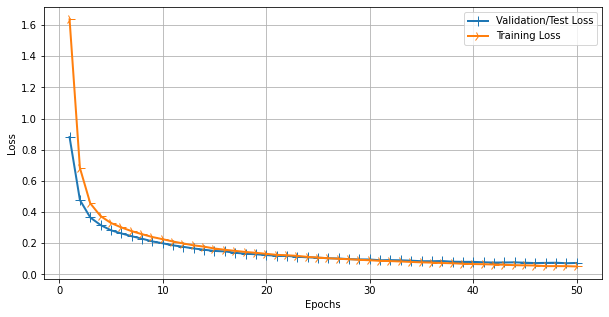

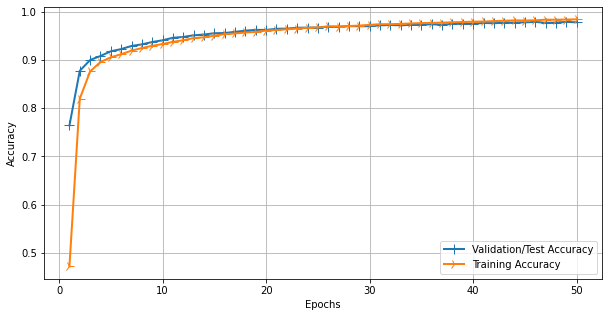

In [113]:
import time

import matplotlib.pyplot as plt

history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,5))

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

## Discussion: Comparison of two models

From the above results, we can see that in terms of accuracy, the two models' performance on test data set are close to each other with accuracy of ~98% and ~99% for model1 and model2 respectively. However, the first model configuration has obviously less shorter computational time( 135.155648319982 seconds) compared to the second configuration (175.60334025599877 seconds).

Looking at the accuracy and loss curves, the second configuration has better training as its training and validation curves gradually and smoothlly increase (accuracy) and decrease (loss) over the epochs reaching to a stable point with very small gap between them. On the hand the curves for the first configuration have some jumps over the epochs  with a higher gap between train and test curves for both loss and accuracy.


## Conclusion
To sum up, the first configuration is less computationally expensive but the second configuration provides more stable and reliable results.